<a href="https://colab.research.google.com/github/jakelaporte/MathematicalModeling/blob/master/Lsn01_ModelBuilding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson1: Model Building - R tutorial #
In this lesson we will construct two functions that you will need for this course and begin to explore the R programming language. Run through the Chapter 1 of the book which talks about model building for a one-variable optimization problem.
Example 1.1 (Meerschaert) A pig weighing 200 lbs gains 5 lbs per day and costs 45 cents per day to keep (feed and board). The market price for pigs is 65 cents per pound, but is falling 1 cent per day. When should the pig be sold?
#### Modeling the Problem #####
Variables:
- $t$ = time (days)<br> 
- $w$ = weight of the pig(lbs)<br>
- $p$ = price for pigs (\$/lb) <br>
- $C$ = cost of keeping pig $t$ days (\$) <br>
- $R$ = revenue obtained by selling pig (\$) <br>
- $P$ = profit from selling pig ($) 


Assumptions: 
- $w = 200+5t$
- $p = 0.65-0.01t$
- $C = 0.45t$
- $R = p \cdot w$
- $P = R-C$
- $t>=0$

Objective: Maximize profits from the sell of the pig<br>
Let $x$ be the time to sell the pig and develop the profit function using $x$ as the independent variable. In the case of an optimization, the variable on which you will make a decision on is generally called a decision variable. There can be multiple decision variables in a problem.

#### Profit Function = Objective function ####
Given the description and mathematical explanation of the variables, lets write out the profit function:<br><br>
$$ \text{profit}(x) = \underbrace{(0.65-0.01x)}_{\text{price of the pig on day }x}\overbrace{(200+5x)}^{\text{weight of pig on day }x} - \underbrace{0.45x}_{\text{cost of keeping pig x days}}$$<br>
Lets use R to "see" what the profit function looks like over the next 20 days.

[1] 133.2


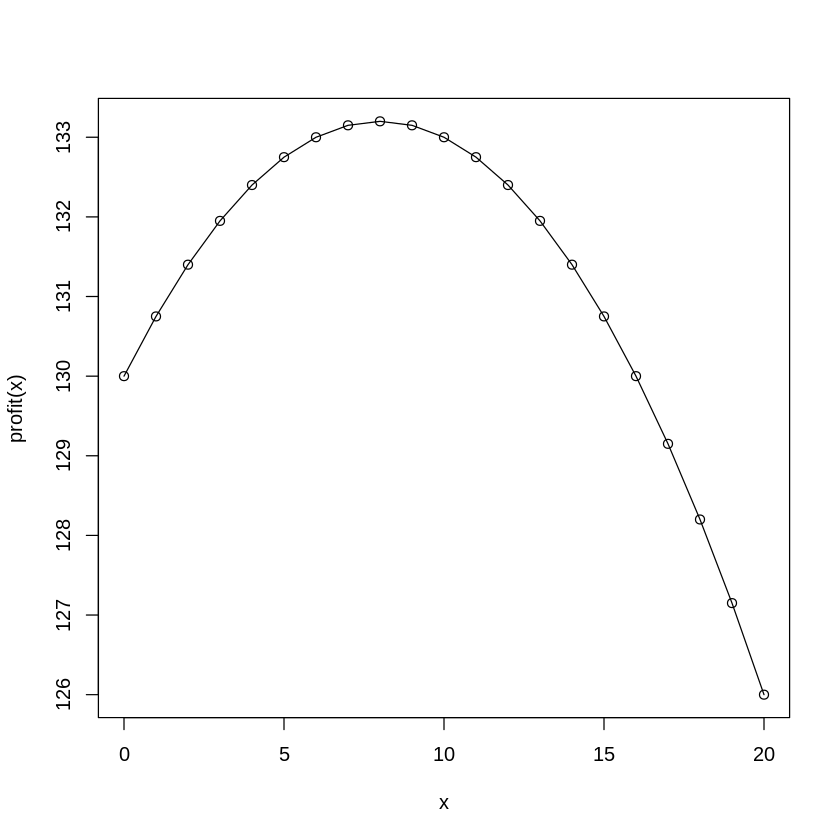

In [1]:
profit = function (x){
  return((0.65-0.01*x)*(200+5*x)-.45*x)
}
x = seq(0,20,1)
plot(x,profit(x),type="o")
print(profit(8))

As you can see, there is a good and bad day to sell the pig if our assumptions remain the same over the next 20 days. Although we could use this graph in order to select the "winner", we want to be able to use this tool (R programming language) to assist us in ensuring that we have all of the information needed to make a decision. That means that we need to get our hands dirty and figure out how to use our tools (in this case, R).

## Build the functions that we need to solve the problem##
We will create two functions that will be able to solve for an optimal point in R using mathematics / programming that we already know how to do.
From calculus, you should remember the definition of the derivative and why tweaking it a little can get us a better estimation of the derivative of a function: <br><br>
$$ f'(x) = \frac{f(x+h)-f(x-h)}{2h} $$ <br>
Using this simple formula, let's build a derivative of the profit function that we defined above. Notice how our function fprime($f$,$x$) will work for ANY function that we assign to it.

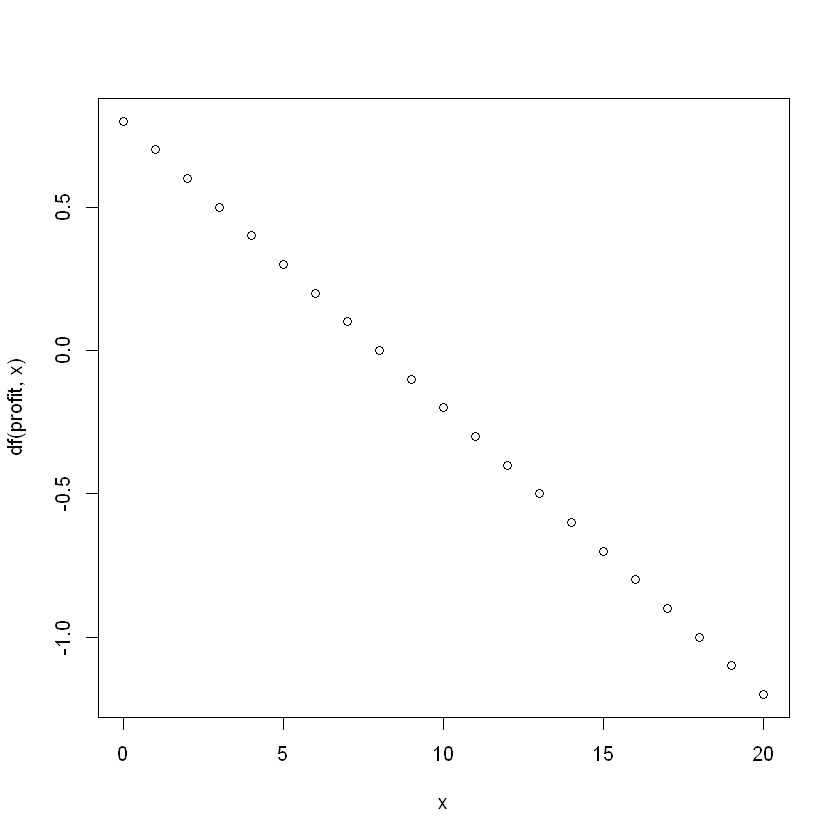

In [0]:
x=seq(0,20)
fprime = function (f,a,h=0.0001){(f(a+h)-f(a-h))/(2*h)}
plot(x,fprime(profit,x))

## Root-Finding Solver ##
Although we could use the graph above to find the solution for this particular problem, it is more appropriate to use math to make our solution automatic. There are many root-finding algorithms out there and feel free to use another, but we will use a simple algorithm known as the bisection method. This method only requires that you select two points that have opposite signs: if $f(a)=- $ then $f(b) = +$. 
#### Bisection Algorithm for finding the root of an equation. 
The simple idea of the bisection method is that you start with an interval $[a,b]$ that has a positive and negative value for the function $f(a)$ and $f(b)$ - it does not matter which one is positive. You cut the interval in half and proceed with the interval that keeps one side positive and the other negative. In the example below, we start on the interval $[2,9]$ which works because $f(2)$ is positive and $f(9)$ is negative. The first step cuts the interval in half and the decision must be made to continue with $[2,5.5]$ or $[5.5,9]$. It should be pretty obvous from the picture that $[2,5.5]$ is the right answer (we want to keep a root in the interval), but from an algorithm perspective, we simply test $f(5.5)$ and find out that it is negative which causes us to replace 9 ($f[9]$ was negative) with 5.5. We would continue this algorithm until we are satisfied that the width of the interval is small enough to make a conclusion about the value of the root. 
<br><br>
<figure style = "border: 0px solid #000;max-width: 500px;align-items:left">
<p style="left;"

![lsn5_1.PNG](attachment:lsn5_1.PNG)

</p>
</figure>



[1] 1.709967


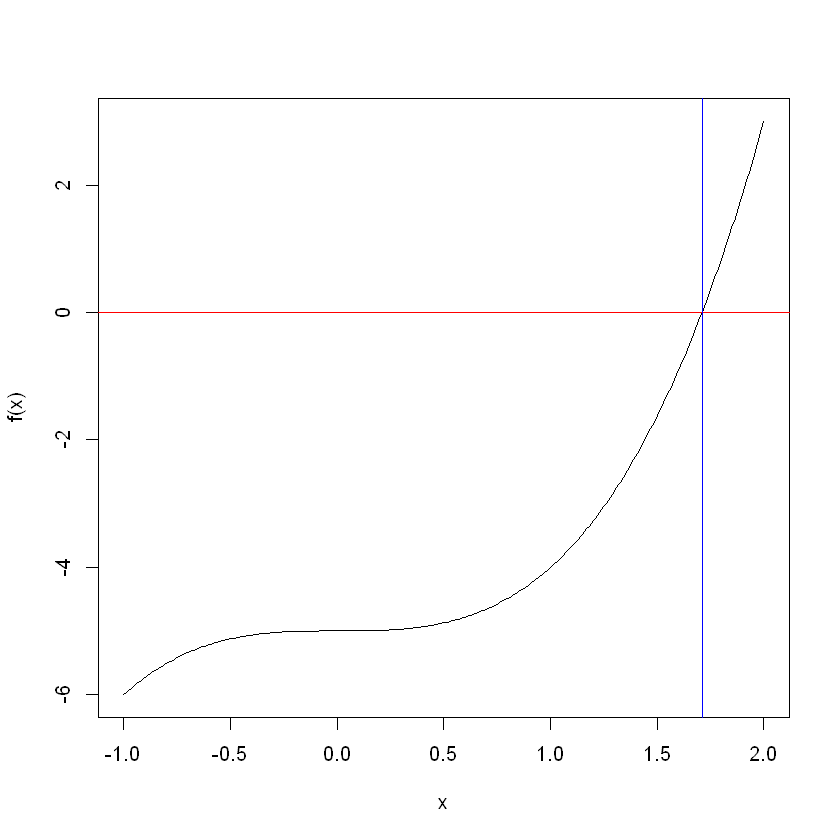

In [0]:
bisection = function(f,a,b,tol=0.0001){
  if (f(a)*f(b) > 0){
    return ("Boundary Conditions Not Met")
  }
  else{
    middle = a
    while (abs(f(middle))>tol){
      middle = (a+b)/2
      if (f(middle)*f(a)>0) (a = middle)
      else (b = middle)
      x=middle
      y=f(middle)
      ## if you want to "see" what happens at every step, take off the # of the next line ##
      #cat(sprintf("x-Val: %.4f ; f(x-val): %.4f\n",x,y))
    }
    return (middle)
  }
}
#Example of a finding a root of a function
f = function (x){x^3-5} #sinlge line function definition
zero=bisection (f,-10,20)
x=seq(-1,2,0.01)
plot(x,f(x),"l")
abline(h=0,col="red")
abline(v=zero,col="blue")
print(zero)

## Use our tool to solve the pig problem ##
Use the tools at your disposal to solve the problem. Be able to make several alternatives to the proposed model and investigate the relationship between multiple variables. When do we sell the pig?

In [0]:
dProfit = function(x){fprime(profit,x)}
bisection(dProfit,0,20)

[1] 8.000488

As you can see, we got approximately the same answer as the book. The difference is that our solution uses an estimation of the derivative instead of the closed-form solution as well as a solver for finding the day $x$ where the profit is maximized (profit function derivative = 0). In the case of most problems, you will use numerical methods (like we did) because real world problems do not ususally have a easy answer. To become a good problem solver, you are going to need to invest in your coding abilities because you will usually need to develop some original code to help you solve a particular problem.

## Sensitivity Analysis ##
Let's go back and examine more closely one of our original assumptions that may or may not hold to see how our solution is afftected by a different assumption. Does the optimal day to sell change if we assume some different price of the pig. Here we let the pig price drop to recreate the numbers in the book, but we are able to do so much more which will be demonstrated in the next analysis.

[1] 15.000000 11.110840  8.000488  5.454102  3.332520


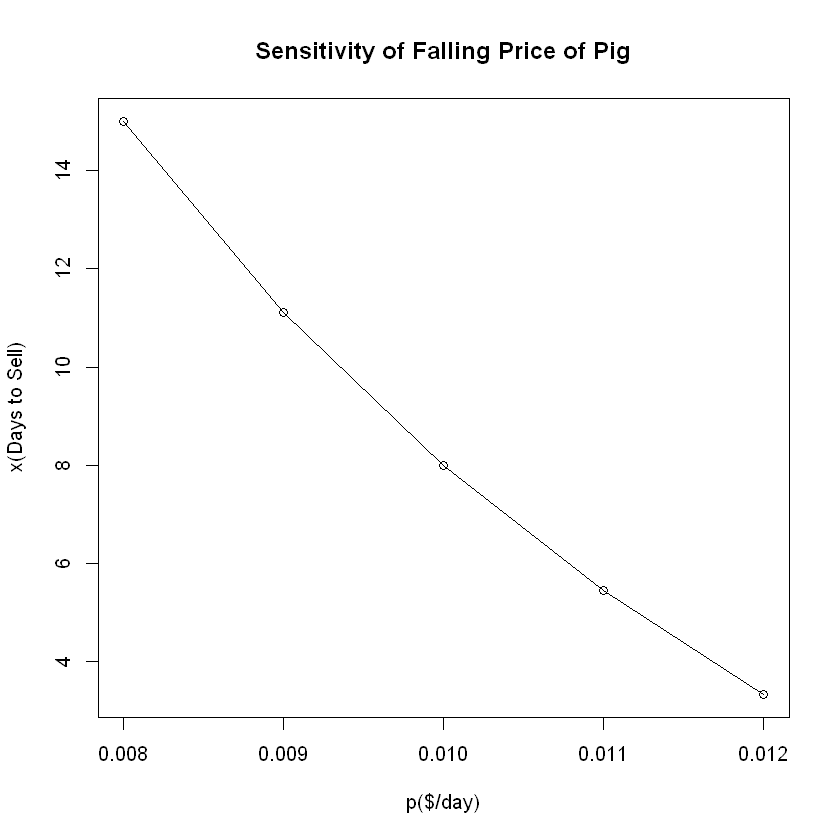

In [0]:
#Price falling per day = p 
p = seq(0.008,0.012,0.001)
ans = array(0,length(p))
for (i in 1:length(p)){
    profit = function (x){
      return((0.65-p[i]*x)*(200+5*x)-.45*x)
    }
    dProfit = function(x){fprime(profit,x,)}
    ans[i] = bisection(dProfit,0,20,0.0001)
}
print(ans)
plot(p,ans,"o",xlab="p($/day)",ylab="x(Days to Sell)")
title("Sensitivity of Falling Price of Pig")

## Sensitivity Analysis: Growth Rate of the Pig
Since we are also concerned about the growth rate of the pig, let's conduct see how the days to sell are affected by the growth rate. The weight ($w$) is calculated using the assumption that the pig will grow 5lbs per day so that:
$w = 200+gt$ where $g=5$. Let's see what happens if $g$ is between 3 and 7. Remember the bisection method needs two boundary points that have the opposite values and if the growth rate is too small, think about what that does to the profit. Experiment with large and small growth rates and the profit function to figure it out for yourself if you don't see it. We needed to make the starting point of the bisection method to the left (negative number) in order for it to find the zero for 3lbs and 3.5lbs per day.

 [1] -90.002441 -49.169922 -28.749084 -16.499329  -8.332825  -2.500916
 [7]   1.875305   5.278778   8.000183  10.227203  12.083435  13.653564
[13]  14.999390  16.166687  17.187500  18.088150  18.889236  19.605637
[19]  20.249939  20.833588  21.363449  21.847534  22.291565


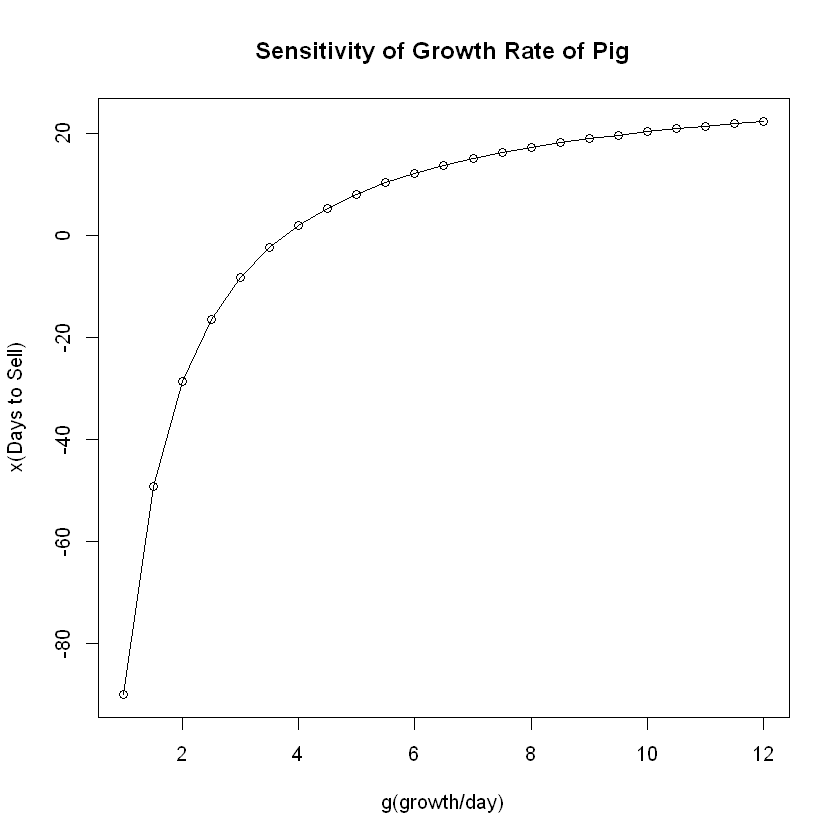

In [0]:
#Growth rate of the pig = g
g = seq(1,12,0.5)
ans = array(0,length(g))
for (i in 1:length(g)){
    profit = function (x){
      return((0.65-0.01*x)*(200+g[i]*x)-.45*x)
    }
    dProfit = function(x){fprime(profit,x,)}
    ans[i] = bisection(dProfit,-100,50,0.0001)
}
print(ans)
plot(g,ans,"o",xlab="g(growth/day)",ylab="x(Days to Sell)")
title("Sensitivity of Growth Rate of Pig")